In [43]:
import pandas as pd
import numpy as np
import math
from sklearn import model_selection, preprocessing, svm
from sklearn.linear_model import LinearRegression

df =pd.read_csv("Google_Stock_Price_train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [46]:
df.dtypes

Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [47]:
df['Close'] =df.Close.astype(np.float64)
df.dtypes

ValueError: could not convert string to float: '1,008.64'

In [48]:
df['Close'] = df['Close'].str.replace(',' , '').astype(float)
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [49]:
df['high_pct'] =( (df['High']-df['Close']) / df['Close'] )*100
df['pct_change'] =( (df['Close']-df['Open']) / df['Open'])*100
df.head()

,Open,High,Low,Close,Volume,high_pct,pct_change
Date,,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",-49.844030,104.024596
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",-49.903219,101.180306
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",-49.673620,99.257193
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",-49.282673,97.429494
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",-48.081384,92.758664


In [50]:
df.drop('Volume', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,high_pct,pct_change
Date,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,-49.844030,104.024596
2012-01-04,331.27,333.87,329.08,666.45,-49.903219,101.180306
2012-01-05,329.83,330.75,326.89,657.21,-49.673620,99.257193
2012-01-06,328.34,328.77,323.68,648.24,-49.282673,97.429494
2012-01-09,322.04,322.29,309.46,620.76,-48.081384,92.758664


In [115]:
forecast_col ='Close'
df.fillna(-99999, inplace =True)

forecast_out =int(math.ceil(0.01*len(df)))

df['label'] =df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,high_pct,pct_change,label
Date,,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,-49.844030,104.024596,584.39
2012-01-04,331.27,333.87,329.08,666.45,-49.903219,101.180306,583.92
2012-01-05,329.83,330.75,326.89,657.21,-49.673620,99.257193,579.34
2012-01-06,328.34,328.77,323.68,648.24,-49.282673,97.429494,567.93
2012-01-09,322.04,322.29,309.46,620.76,-48.081384,92.758664,566.54


In [169]:
df.head()
X1 =np.array(df.drop(['label'], axis=1))
X =preprocessing.scale(X)

X =X1[:-forecast_out]
X_lately =X1[-forecast_out:]

df.dropna(inplace =True)
y1 =np.array(df['label'])
y =y1[:-forecast_out]

print(len(X), len(y))

1094 1094


In [192]:
X_train, X_test, y_train, y_test =model_selection.train_test_split(X, y, test_size =0.2)

clf =LinearRegression()    # n_jobs = 10 or -1(as many as posible)
clf.fit(X_train, y_train)
accuracy =clf.score(X_test, y_test)
print(accuracy)

0.9385110351086803


In [193]:
forecast_out

12

In [194]:
forecast_set =clf.predict(X_lately)
forecast_set

array([722.99618359, 713.34902173, 711.48734782, 714.9159189 ,
       712.6112124 , 704.92920677, 707.3605428 , 701.37844384,
       709.44948664, 710.14197469, 716.76851189, 726.55315138])

In [198]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [213]:
import datetime

df['forecast'] = np.nan

last_date =df.iloc[-1].name
last_unix =last_date.timestamp()
one_day =86400
next_unix =last_unix + one_day

for i in forecast_set:
    next_date =datetime.datetime.fromtimestamp(next_unix)
    next_unix +=one_day
    df.loc[next_date] =[np.nan for _ in range(len(df.columns)-1)] + [i]

df.tail()

,Open,High,Low,Close,high_pct,pct_change,label,forecast
Date,,,,,,,,
2016-10-14 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.378444
2016-10-15 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709.449487
2016-10-16 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710.141975
2016-10-17 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716.768512
2016-10-18 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.553151


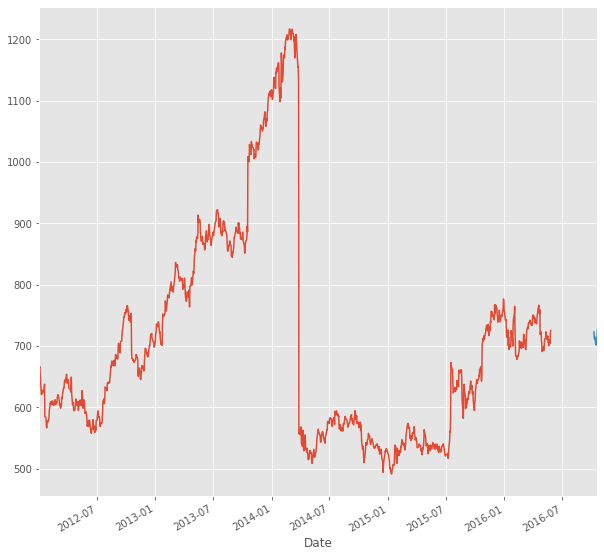

In [215]:
#fig =plt.figure(figsize=(10,10))


df['Close'].plot(figsize=(10,10))
df['forecast'].plot(figsize=(10,10))
plt.show()

In [26]:
import pickle

with open('googl_stock_pickle', 'wb') as f:
    pickle.dump(clf, f)
    
pickle_in =open('googl_stock_pickle', 'rb')
clf_2 =pickle.load(pickle_in)

NameError: name 'clf' is not defined